In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey here and the survey for the DETE here.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

ID: An id used to identify the participant of the survey
SeparationType: The reason why the person's employment ended
Cease Date: The year or month the person's employment ended
DETE Start Date: The year the person began employment with the DETE
Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

Record ID: An id used to identify the participant of the survey
Reason for ceasing employment: The reason why the person's employment ended
LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
import pandas as pd


In [72]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Observations: 1) The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
2) Columns had been divided based on reasons or values instead of one column for multiple values

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Observations:Same problem as dete_survey.csv file - multiple Columns there based on reasons or values instead of one column for multiple values

In [73]:
print(dete_survey.isnull().sum())
print(tafe_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [11]:
dete_survey.iloc[0]

ID                                                                     1
SeparationType                                     Ill Health Retirement
Cease Date                                                       08/2012
DETE Start Date                                                     1984
Role Start Date                                                     2004
Position                                                  Public Servant
Classification                                                   A01-A04
Region                                                    Central Office
Business Unit                          Corporate Strategy and Peformance
Employment Status                                    Permanent Full-time
Career move to public sector                                        True
Career move to private sector                                      False
Interpersonal conflicts                                            False
Job dissatisfaction                                

In [12]:
tafe_survey.iloc[0]

Record ID                                                                                                                                                                                  6.34133e+17
Institute                                                                                                                                                        Southern Queensland Institute of TAFE
WorkArea                                                                                                                                                                      Non-Delivery (corporate)
CESSATION YEAR                                                                                                                                                                                    2010
Reason for ceasing employment                                                                                                                                                         Contract Expired
Contr

Observations on both dataset: 1) that both datasets contain various columns which are not needed in order to perform our analysis. 
2) Various columns are there just to identify employees who ceased their employment due to dissatisfaction.

In [74]:
# dete_survey.csv has  Not Stated values in as NaN - lets replace it as 
#NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [75]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [76]:
#Data Cleaning dete_survey dataset
#Let's drop unnecessary columns for analysis
dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],
                                       axis = 1)

In [77]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [78]:
#Data Cleaning tafe_survey dataset
#Let's drop unnecessary columns for analysis
tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],
                                       axis = 1)

In [25]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

After dropping unnecessary columns, let look atthe columns names.Each dataframe contains many of the same columns, but the column names are different. 
Below are some of the columns we'd like to use for our final analysis:

dete_survey     tafe_survey	   Definition
ID	            Record ID	   An id used to identify the participant of the survey

SeparationType	Reason for ceasing employment  The reason why the participant's employment ended

Cease Date	    CESSATION YEAR	The year or month the participant's employment ended

DETE Start Date		            The year the participant began employment with the DETE
                 LengthofServiceOverall.
                 Overall Length of Service at Institute (in years)
The length of the person's employment (in years)

Age	             CurrentAge      The age of the participant
                 Current Age

Gender	         Gender           The gender of the participant
                 What is your Gender?


In [79]:
#Let's standardidize the column names of both dataset to ease the use
#for combined analysis 
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ', '_').str.strip()

tafe_mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 
               'Reason for ceasing employment': 'separationtype', 
               'Gender. What is your Gender?': 'gender', 
               'CurrentAge. Current Age': 'age', 
               'Employment Type. Employment Type': 'employment_status',
               'Classification. Classification' : 'position', 
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(tafe_mapping, axis = 1)

In [81]:
## DETE Survey
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [82]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We are doing analysis to know the answer of 1st question i.e. - Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

That means we are here to analyse data on Resignation cases only.


In [83]:
#Lets review the unique values of both datasets -
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [84]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [85]:
#data for dete survey respondents who have a Resignation separation type.
dete_resigned = dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated.copy()
dete_resignations = dete_resignations[dete_resigned]

In [86]:
dete_resignations[dete_resigned]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [87]:
#data for tafe survey respondents who have a Resignation separation type.
tafe_resignations = tafe_survey_updated.copy()
tafe_resignations = tafe_resignations[tafe_resignations['separationtype'] == 'Resignation']

In [88]:
print('DETE Survey initial rows: ', dete_survey_updated.shape[0])
print('DETE Survey resignation rows: ', dete_resignations.shape[0])

print('TAFE Survey initial rows: ', tafe_survey_updated.shape[0])
print('TAFE Survey resignation rows: ', tafe_resignations.shape[0])

DETE Survey initial rows:  822
DETE Survey resignation rows:  311
TAFE Survey initial rows:  702
TAFE Survey resignation rows:  340


We have filtered dataset as per our requirement and can see lesser rows now for both dataset.

#Verifying the data
In this next step in our data cleaning process, we will look for errors in the dataset. We will start by checking that the dates in the cease_date and dete_start_date columns seem sensible. Note that the start date is only available in the DETE dataset, so we will only verify this for dete_resignations.

In particular, we can verify that no cease date comes before the start date, and that no start date is lower than around 1940, given that most people in this field start working in their 20s and a date before 1940 would imply the person resigned at about 100 years of age.

In [89]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

We note that values need to be cleaned in order to work with the dates. Specifically, we will extract the year from these dates using regular expressions. To make things easier, we note that all cease dates belong to the current milennium.

In [90]:
#Use vectorized string methods to extract the year
dete_resignations['cease_year'] = dete_resignations['cease_date'].str.extract(r'(2[0-9]{3})', expand = False)

In [91]:
#convert the type to a float
dete_resignations['cease_year'] = dete_resignations['cease_year'].astype(float)

In [93]:
dete_resignations['cease_year'].value_counts().sort_index(ascending= True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_year, dtype: int64

In [94]:
#dete_start_date - person's first year of employment
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [95]:
#tafe dataset ceasedate count
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

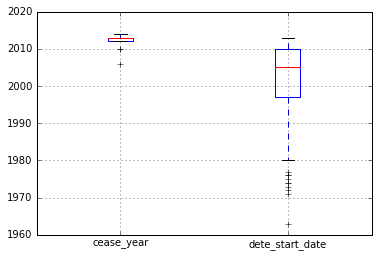

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
dete_resignations.boxplot(column= ['cease_year', 'dete_start_date'])
plt.show()

In [102]:
dete_resignations.describe()

,id,dete_start_date,role_start_date,cease_year
count,311.000000,283.000000,271.000000,300.00000
mean,427.739550,2002.067138,1999.653137,2012.60000
std,235.028398,9.914479,109.965675,0.75403
min,4.000000,1963.000000,200.000000,2006.00000
25%,256.500000,1997.000000,2004.000000,2012.00000
50%,434.000000,2005.000000,2009.000000,2013.00000
75%,626.500000,2010.000000,2011.000000,2013.00000
max,823.000000,2013.000000,2013.000000,2014.00000


cease date is later than dete_start_date - plot looks fine

Don't see any major issues with years

Considering our analytical goals to identify differences in resignation reasons between employees who worked at a short time and employees who worked at a long time at the institutions, we need a column that details the length of service of the employee. tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [104]:
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Now we know the length of service - next thing to find out employees who resigned their job because of dissatisfaction

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe -

tafe_survey_updated:

Contributing Factors. Dissatisfaction, Contributing Factors. Job Dissatisfaction

dafe_survey_updated:

job_dissatisfaction, dissatisfaction_with_the_department, physical_work_environment, lack_of_recognition, lack_of_job_security, work_location ,employment_conditions, ,work_life_balance, workload

In [106]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [107]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [109]:
tafe_resignations['Contributing Factors. Dissatisfaction'].unique()

array(['-', 'Contributing Factors. Dissatisfaction ', nan], dtype=object)

The column 'Contributing Factors. Dissatisfaction' contains only 3 values - '-', 'Contributing Factors. Dissatisfaction ', nan

In [110]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique()

array(['-', 'Job Dissatisfaction', nan], dtype=object)

Same as above column 'Contributing Factors. Job Dissatisfaction' contains only 3 values - '-', 'Job Dissatisfaction ', nan

In [119]:
import numpy as np
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True

In [120]:
tafe_factors = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)


In [121]:
tafe_resignations['dissatisfied'] = tafe_factors.any(axis = 1, skipna = False)

In [126]:
#Lets apply the same on Dete dataset
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 
                                                          'physical_work_environment', 'lack_of_recognition', 
                                                          'lack_of_job_security', 'work_location', 
                                                          'employment_conditions', 'work_life_balance', 
                                                          'workload']].any(axis = 1, skipna = False)

In [128]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Our end goal is to aggregate the data according to the institute_service column

In [136]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

In [137]:
combined.head()

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False


In [143]:
combined.count()

Contributing Factors. Career Move - Private Sector     332
Contributing Factors. Career Move - Public Sector      332
Contributing Factors. Career Move - Self-employment    332
Contributing Factors. Dissatisfaction                  332
Contributing Factors. Ill Health                       332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Job Dissatisfaction              332
Contributing Factors. Maternity/Family                 332
Contributing Factors. NONE                             332
Contributing Factors. Other                            332
Contributing Factors. Study                            332
Contributing Factors. Travel                           332
Institute                                              340
WorkArea                                               340
aboriginal                                               7
age                                                    596
business_unit                                           

In [144]:
#Drop any columns with less than 500 non null values.
combined_updated = combined.dropna(thresh = 500, axis = 1)

In [145]:
combined_updated.count()

age                  596
cease_date           635
dissatisfied         643
employment_status    597
gender               592
id                   651
institute            651
institute_service    563
position             598
separationtype       651
dtype: int64

In [147]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [148]:
combined_updated['institute_service']

0                     7
1                    18
2                     3
3                    15
4                     3
5                    14
6                     5
7                   NaN
8                    30
9                    32
10                   15
11                   39
12                   17
13                    7
14                    9
15                    6
16                    1
17                  NaN
18                   35
19                   38
20                    1
21                   36
22                    3
23                    3
24                   19
25                    4
26                    9
27                    1
28                    6
29                    1
             ...       
621                 1-2
622                 3-4
623                 5-6
624                 NaN
625                 NaN
626                 3-4
627                 NaN
628    Less than 1 year
629    Less than 1 year
630                 1-2
631    Less than

The column contains values in a couple different forms

In [164]:
years_service = combined_updated['institute_service'].astype(str).str.extract(r'([0-9][0-9]?)').astype(float)
years_service

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
5      14.0
6       5.0
7       NaN
8      30.0
9      32.0
10     15.0
11     39.0
12     17.0
13      7.0
14      9.0
15      6.0
16      1.0
17      NaN
18     35.0
19     38.0
20      1.0
21     36.0
22      3.0
23      3.0
24     19.0
25      4.0
26      9.0
27      1.0
28      6.0
29      1.0
       ... 
621     1.0
622     3.0
623     5.0
624     NaN
625     NaN
626     3.0
627     NaN
628     1.0
629     1.0
630     1.0
631     1.0
632     3.0
633     1.0
634     1.0
635     1.0
636     1.0
637     3.0
638     1.0
639     5.0
640     5.0
641     1.0
642     NaN
643     3.0
644     1.0
645     NaN
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service, Length: 651, dtype: float64

To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

New: Less than 3 years at a company,
Experienced: 3-6 years at a company,
Established: 7-10 years at a company,
Veteran: 11 or more years at a company

In [162]:
def categorize(element):
    if pd.isnull(element):
        return np.nan
    elif element < 3:
        return 'New'
    elif (element >= 3) and (element <=6):
        return 'Experienced'
    elif (element >= 7) and (element <=10):
        return 'Established'
    elif element>=11:
        return 'Veteran'
        
    

In [166]:
years_service

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
5      14.0
6       5.0
7       NaN
8      30.0
9      32.0
10     15.0
11     39.0
12     17.0
13      7.0
14      9.0
15      6.0
16      1.0
17      NaN
18     35.0
19     38.0
20      1.0
21     36.0
22      3.0
23      3.0
24     19.0
25      4.0
26      9.0
27      1.0
28      6.0
29      1.0
       ... 
621     1.0
622     3.0
623     5.0
624     NaN
625     NaN
626     3.0
627     NaN
628     1.0
629     1.0
630     1.0
631     1.0
632     3.0
633     1.0
634     1.0
635     1.0
636     1.0
637     3.0
638     1.0
639     5.0
640     5.0
641     1.0
642     NaN
643     3.0
644     1.0
645     NaN
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service, Length: 651, dtype: float64

In [167]:
service_cat = years_service.apply(categorize)

In [170]:
final = combined_updated.copy()
final['service_cat'] = service_cat

In [171]:
final.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
0,36-40,05/2012,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons,Established
1,41-45,05/2012,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons,Veteran
2,31-35,07/2012,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons,Experienced
3,46-50,2012,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer,Veteran
4,31-35,2012,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate,Experienced


In [173]:
final['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [174]:
final.isnull().sum()

age                  55
cease_date           16
dissatisfied          8
employment_status    54
gender               59
id                    0
institute             0
institute_service    88
position             53
separationtype        0
service_cat          88
dtype: int64

In [175]:
final['dissatisfied'] = final['dissatisfied'].fillna(False)

In [176]:
final.isnull().sum()

age                  55
cease_date           16
dissatisfied          0
employment_status    54
gender               59
id                    0
institute             0
institute_service    88
position             53
separationtype        0
service_cat          88
dtype: int64

In [177]:
pivot_final = final.pivot_table(index = 'service_cat', values = 'dissatisfied' )

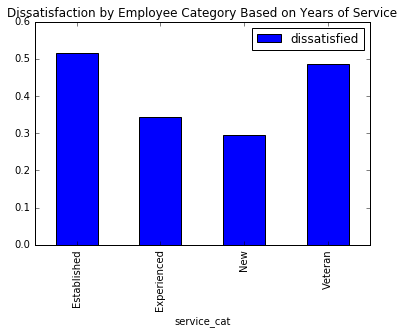

In [178]:
pivot_final.plot(kind = 'bar')
plt.title('Dissatisfaction by Employee Category Based on Years of Service')
plt.show()

We can conclude from here Established(worked for more than 6 years) and Veteran(worked for more than 10 years )seems to be more dissatisfied compared to Experienced and New employees who worked for shorter duration.